In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/nishithkotak/machine-learning/refs/heads/master/KMeans.csv"
dataset = pd.read_csv(url)
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [4]:
x=dataset.iloc[:,[1,2]].values


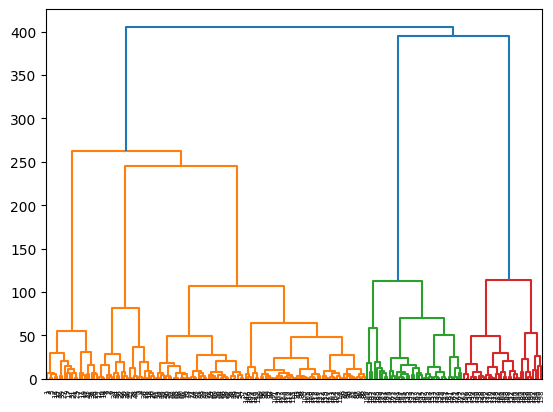

In [5]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
yhc=hc.fit_predict(x)


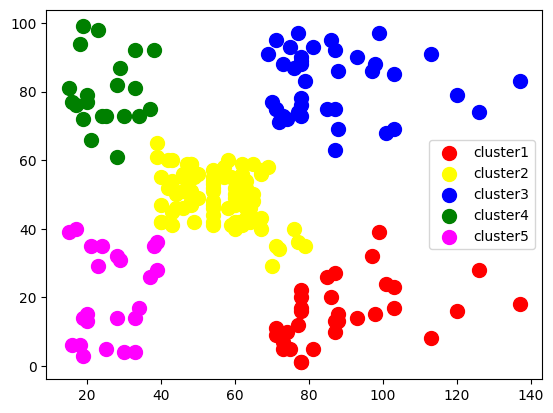

In [7]:
#plot the cluster
plt.scatter(x[yhc==0,0],x[yhc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[yhc==1,0],x[yhc==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(x[yhc==2,0],x[yhc==2,1],s=100,c='blue',label='cluster3')
plt.scatter(x[yhc==3,0],x[yhc==3,1],s=100,c='green',label='cluster4')
plt.scatter(x[yhc==4,0],x[yhc==4,1],s=100,c='magenta',label='cluster5')
plt.legend()

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [9]:
x=StandardScaler().fit_transform(x)

db=DBSCAN(eps=0.3,min_samples=6).fit(x)

db.labels_

db.core_sample_indices_

len(set(db.labels_))

7

In [11]:
#Identify the boundry points
#Visulize the points in following catogary
#1. Noise Points: as black color
#2. All the cluster points as different colors
#2a. core points size > Boundary point size

# Get the labels assigned by DBSCAN
labels = db.labels_

In [12]:
# Get the indices of the core points
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)


In [14]:
# Plot the results
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


In [15]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

In [16]:
    class_member_mask = (labels == k)


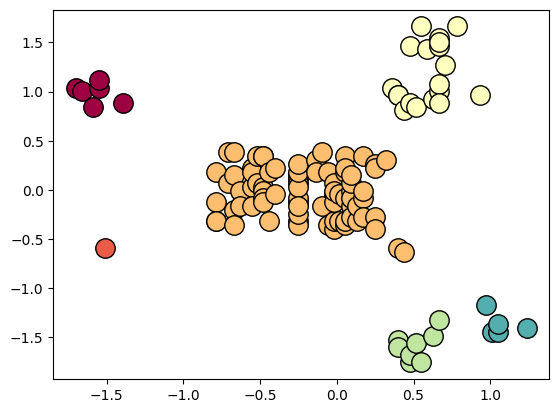

In [20]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core points
    xy = x[class_member_mask & core_samples_mask] # <--- Correctly indented
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    # ... rest of the loop

In [21]:
 # Plot non-core points (boundary points)
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)


IndentationError: unexpected indent (ipython-input-957306495.py, line 2)

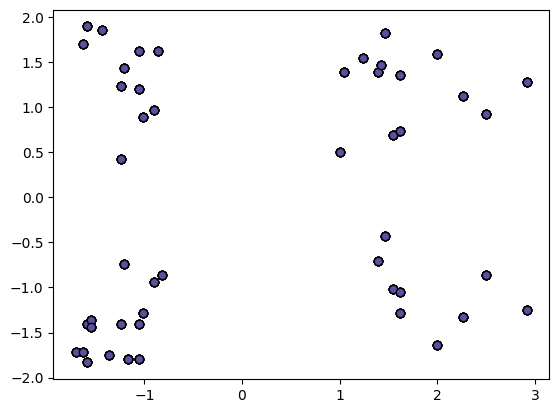

In [22]:
for k, col in zip(unique_labels, colors):
    # ... code for plotting core points ...

    # Plot non-core points (boundary points)
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    # ... and so on

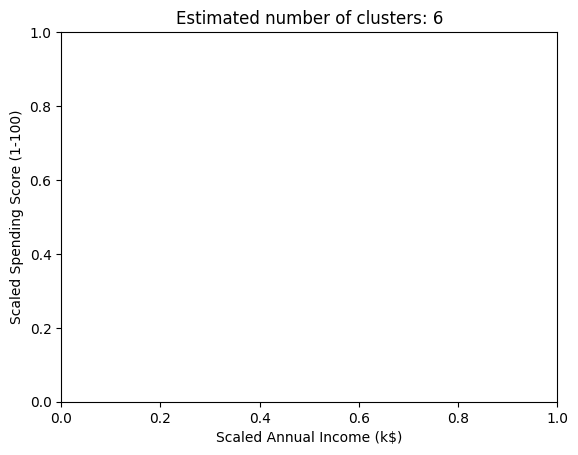

In [23]:
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score (1-100)')
plt.show()

#highrical both
#dbscan
#kmean